# Import the required packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
df=pd.read_csv("car data.csv")# loading the dataset



In [42]:
df.head()  # reading the first five rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe() # returns the statistical summary  for NUMERICAL DATA

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info() #  dataset size and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape # printing the rows and columns

(301, 9)

In [7]:
df.isnull().sum() # finding the null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.columns # reading the columns from dataset

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
print(df['Fuel_Type'].value_counts()) # reading the count ofthe values in Fuel_Type

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [10]:
print(df['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [11]:
print(df['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


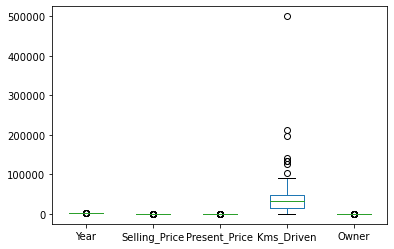

In [12]:
df.plot(kind='box')
plt.show()

In [17]:
Fuel_Type=df['Fuel_Type']
Seller_Type=df['Seller_Type']
Transmission=df['Transmission']
Selling_Price=df['Selling_Price']

In [18]:
from matplotlib import style

Text(0.5, 0, 'Transmission')

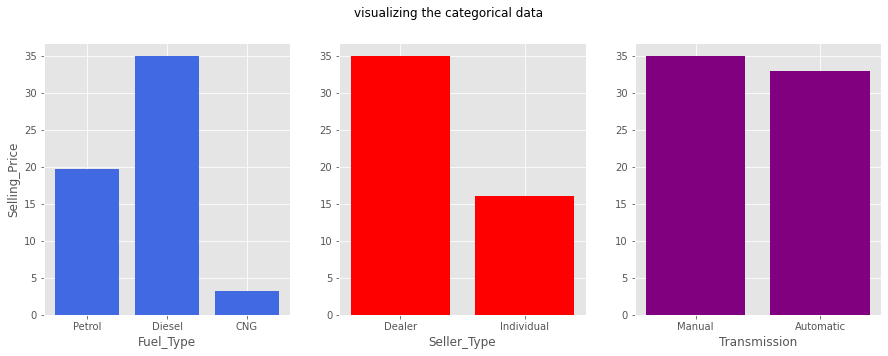

In [19]:
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle('visualizing the categorical data')
plt.subplot(1,3,1)
plt.bar(Fuel_Type,Selling_Price,color='royalblue')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.subplot(1,3,2)
plt.bar(Seller_Type,Selling_Price,color='red')
plt.xlabel('Seller_Type')

plt.subplot(1,3,3)
plt.bar(Transmission,Selling_Price,color='purple')
plt.xlabel('Transmission')






In [21]:
#manual encoding
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
#onehot encoding
df=pd.get_dummies(df,columns=[ 'Seller_Type', 'Transmission'],drop_first=True)

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


<AxesSubplot:>

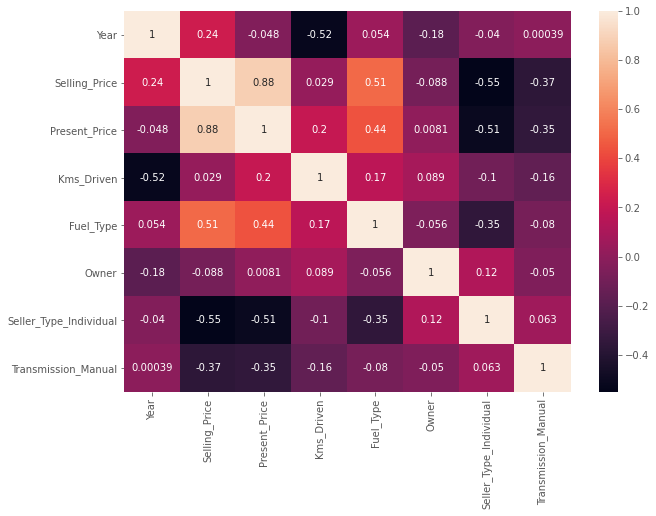

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

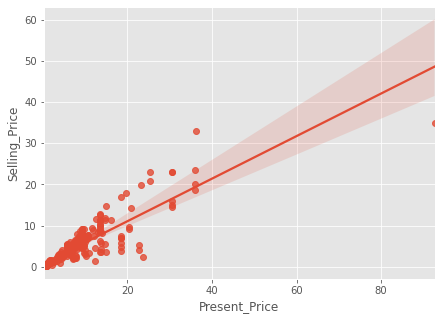

In [24]:
#regression plot
plt.figure(figsize=(7,5))
sns.regplot(x='Present_Price',y='Selling_Price',data=df)

# Training Data and Testing Data Split

In [25]:
#definex,y
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [26]:
print(x.shape)
print(y.shape)

(301, 7)
(301,)


In [27]:
#train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


In [29]:
#normalize the scalar by stanfardization
scaler=StandardScaler()

In [30]:

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
model=LinearRegression()

In [32]:
# fit xtrain and ytrain in model
model.fit(x_train,y_train)

LinearRegression()

In [33]:
#create a var to store predicted value
pred=model.predict(x_test)

In [34]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8815785498450739
0.8466064262307098


In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
print("mae",(metrics.mean_absolute_error(pred,y_test)))
print("mse",(metrics.mean_squared_error(pred,y_test)))
print("r2",(metrics.r2_score(pred,y_test)))

mae 1.1337712818042074
mse 2.9987023693079915
r2 0.8403771285928895


Text(0, 0.5, 'actual')

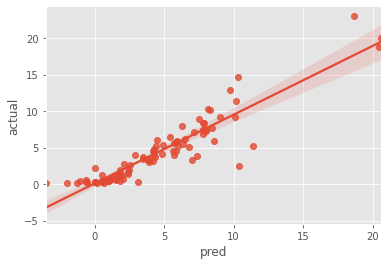

In [40]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("pred")
plt.ylabel("actual")